# Lab 3: Data Preparation

## Objective
To prepare raw data for mining by cleaning, transforming, and reducing it.

## Topics Covered
- **Data Cleaning**: Handling missing, noisy, and inconsistent data
- **Data Transformation**: Normalization, Standardization, Encoding
- **Dimensionality Reduction**: PCA (Principal Component Analysis)
- **Feature Encoding**: Label Encoding, One-Hot Encoding

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Load the Dataset

In [3]:
# Load the Adult Census Income Dataset
# The dataset contains '?' as missing values, we'll handle them properly
df = pd.read_csv(r"dataset/adult.csv")

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows of the dataset:")
df.head()

Dataset Shape: (32561, 15)

First 5 rows of the dataset:


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
# Display dataset information
print("Dataset Info:")
print(df.info())
print("\n" + "="*50)
print("\nColumn Names:")
print(df.columns.tolist())
print("\n" + "="*50)
print("\nData Types:")
print(df.dtypes)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


Column Names:
['age', 'workclass', 'fnlwgt', 'education', 'education.num

In [5]:
# Statistical Summary of the dataset
print("Statistical Summary:")
df.describe(include='all')

Statistical Summary:


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


## 2. Data Cleaning

### 2.1 Identifying Missing Values

In [6]:
# Replace '?' with NaN for proper missing value handling
df_cleaned = df.replace('?', np.nan)

# Check for missing values
print("Missing Values Count:")
missing_values = df_cleaned.isnull().sum()
print(missing_values)

print("\n" + "="*50)
print("\nMissing Values Percentage:")
missing_percentage = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100
print(missing_percentage[missing_percentage > 0])

Missing Values Count:
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


Missing Values Percentage:
workclass         5.638647
occupation        5.660146
native.country    1.790486
dtype: float64


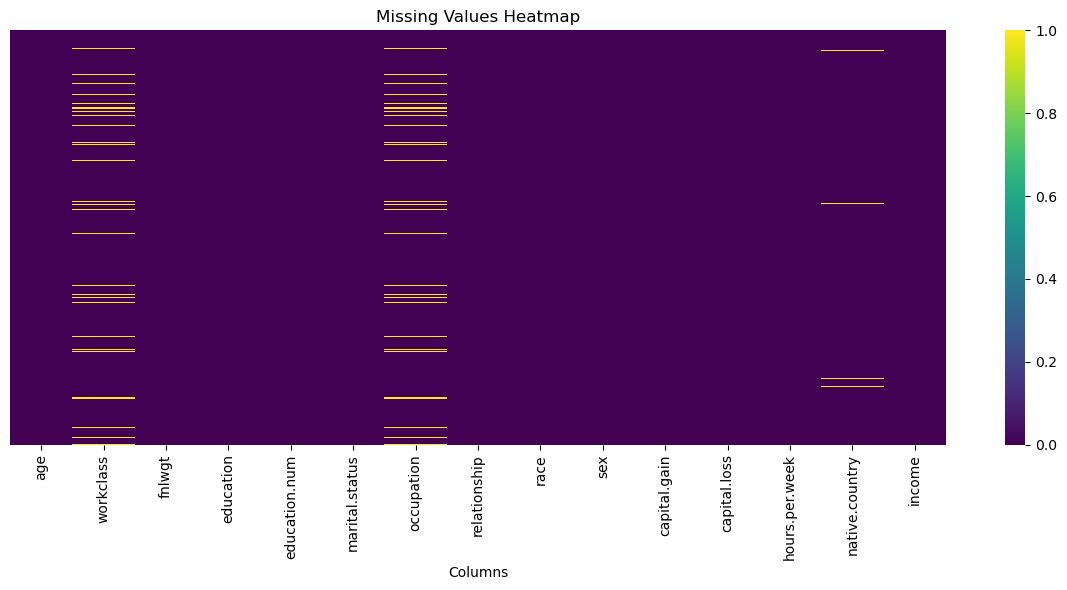

In [7]:
# Visualize missing values using heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_cleaned.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.tight_layout()
plt.show()

### 2.2 Imputation Techniques

#### Handling Missing Values in Numerical Columns (Mean/Median Imputation)

In [8]:
# Identify numerical and categorical columns
numerical_cols = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:", numerical_cols)
print("\nCategorical Columns:", categorical_cols)

Numerical Columns: ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

Categorical Columns: ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']


In [9]:
# Mean Imputation for numerical columns
print("=== Mean Imputation for Numerical Columns ===\n")

# Create a copy for mean imputation
df_mean_imputed = df_cleaned.copy()

for col in numerical_cols:
    if df_mean_imputed[col].isnull().sum() > 0:
        mean_value = df_mean_imputed[col].mean()
        df_mean_imputed[col].fillna(mean_value, inplace=True)
        print(f"Column '{col}': Imputed with mean = {mean_value:.2f}")

print("\nMissing values after mean imputation (numerical):")
print(df_mean_imputed[numerical_cols].isnull().sum())

=== Mean Imputation for Numerical Columns ===


Missing values after mean imputation (numerical):
age               0
fnlwgt            0
education.num     0
capital.gain      0
capital.loss      0
hours.per.week    0
dtype: int64


In [10]:
# Median Imputation for numerical columns (Alternative)
print("=== Median Imputation for Numerical Columns ===\n")

# Create a copy for median imputation
df_median_imputed = df_cleaned.copy()

for col in numerical_cols:
    if df_median_imputed[col].isnull().sum() > 0:
        median_value = df_median_imputed[col].median()
        df_median_imputed[col].fillna(median_value, inplace=True)
        print(f"Column '{col}': Imputed with median = {median_value:.2f}")

print("\nMissing values after median imputation (numerical):")
print(df_median_imputed[numerical_cols].isnull().sum())

=== Median Imputation for Numerical Columns ===


Missing values after median imputation (numerical):
age               0
fnlwgt            0
education.num     0
capital.gain      0
capital.loss      0
hours.per.week    0
dtype: int64


#### Handling Missing Values in Categorical Columns (Mode Imputation)

In [11]:
# Mode Imputation for categorical columns
print("=== Mode Imputation for Categorical Columns ===\n")

# We'll use the mean imputed dataframe and add mode imputation for categorical
df_imputed = df_mean_imputed.copy()

for col in categorical_cols:
    if df_imputed[col].isnull().sum() > 0:
        mode_value = df_imputed[col].mode()[0]
        df_imputed[col].fillna(mode_value, inplace=True)
        print(f"Column '{col}': Imputed with mode = '{mode_value}'")

print("\nMissing values after all imputations:")
print(df_imputed.isnull().sum().sum(), "total missing values remaining")

=== Mode Imputation for Categorical Columns ===

Column 'workclass': Imputed with mode = 'Private'
Column 'occupation': Imputed with mode = 'Prof-specialty'
Column 'native.country': Imputed with mode = 'United-States'

Missing values after all imputations:
0 total missing values remaining


In [12]:
# Using SimpleImputer from sklearn (Alternative approach)
print("=== Using SimpleImputer from Sklearn ===\n")

# For numerical columns - Mean strategy
num_imputer = SimpleImputer(strategy='mean')
df_sklearn_imputed = df_cleaned.copy()

if len(numerical_cols) > 0:
    df_sklearn_imputed[numerical_cols] = num_imputer.fit_transform(df_cleaned[numerical_cols])
    print("Numerical columns imputed using SimpleImputer (mean strategy)")

# For categorical columns - Most frequent strategy
cat_imputer = SimpleImputer(strategy='most_frequent')
if len(categorical_cols) > 0:
    df_sklearn_imputed[categorical_cols] = cat_imputer.fit_transform(df_cleaned[categorical_cols])
    print("Categorical columns imputed using SimpleImputer (most_frequent strategy)")

print("\nMissing values after sklearn imputation:")
print(df_sklearn_imputed.isnull().sum().sum(), "total missing values remaining")

=== Using SimpleImputer from Sklearn ===

Numerical columns imputed using SimpleImputer (mean strategy)
Categorical columns imputed using SimpleImputer (most_frequent strategy)

Missing values after sklearn imputation:
0 total missing values remaining


## 3. Data Transformation

### 3.1 Feature Encoding

#### Label Encoding
Converts categorical labels to numerical values (0, 1, 2, ...)

In [13]:
# Label Encoding for categorical columns
print("=== Label Encoding ===\n")

df_label_encoded = df_imputed.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_label_encoded[col] = le.fit_transform(df_label_encoded[col].astype(str))
    label_encoders[col] = le
    print(f"Column '{col}':")
    print(f"  Classes: {list(le.classes_[:5])}{'...' if len(le.classes_) > 5 else ''}")
    print(f"  Encoded values: 0 to {len(le.classes_)-1}\n")

print("Label Encoded DataFrame (first 5 rows):")
df_label_encoded.head()

=== Label Encoding ===

Column 'workclass':
  Classes: ['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc']...
  Encoded values: 0 to 7

Column 'education':
  Classes: ['10th', '11th', '12th', '1st-4th', '5th-6th']...
  Encoded values: 0 to 15

Column 'marital.status':
  Classes: ['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married']...
  Encoded values: 0 to 6

Column 'occupation':
  Classes: ['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing']...
  Encoded values: 0 to 13

Column 'relationship':
  Classes: ['Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried']...
  Encoded values: 0 to 5

Column 'race':
  Classes: ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White']
  Encoded values: 0 to 4

Column 'sex':
  Classes: ['Female', 'Male']
  Encoded values: 0 to 1

Column 'native.country':
  Classes: ['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba']...
  E

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0


#### One-Hot Encoding
Creates binary columns for each category

In [14]:
# One-Hot Encoding using pandas get_dummies
print("=== One-Hot Encoding ===\n")

# Select a few categorical columns for demonstration (to avoid too many columns)
# We'll use columns with fewer unique values
cols_for_onehot = [col for col in categorical_cols if df_imputed[col].nunique() <= 10]
print(f"Columns selected for One-Hot Encoding: {cols_for_onehot}\n")

df_onehot = pd.get_dummies(df_imputed, columns=cols_for_onehot, drop_first=False)

print(f"Original shape: {df_imputed.shape}")
print(f"After One-Hot Encoding shape: {df_onehot.shape}")
print(f"\nNew columns created: {df_onehot.shape[1] - df_imputed.shape[1] + len(cols_for_onehot)}")

print("\nOne-Hot Encoded DataFrame (first 5 rows):")
df_onehot.head()

=== One-Hot Encoding ===

Columns selected for One-Hot Encoding: ['workclass', 'marital.status', 'relationship', 'race', 'sex', 'income']

Original shape: (32561, 15)
After One-Hot Encoding shape: (32561, 39)

New columns created: 30

One-Hot Encoded DataFrame (first 5 rows):


,age,fnlwgt,education,education.num,occupation,capital.gain,capital.loss,hours.per.week,native.country,workclass_Federal-gov,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,90,77053,HS-grad,9,Prof-specialty,0,4356,40,United-States,False,...,False,False,False,False,False,True,True,False,True,False
1,82,132870,HS-grad,9,Exec-managerial,0,4356,18,United-States,False,...,False,False,False,False,False,True,True,False,True,False
2,66,186061,Some-college,10,Prof-specialty,0,4356,40,United-States,False,...,False,False,False,True,False,False,True,False,True,False
3,54,140359,7th-8th,4,Machine-op-inspct,0,3900,40,United-States,False,...,False,False,False,False,False,True,True,False,True,False
4,41,264663,Some-college,10,Prof-specialty,0,3900,40,United-States,False,...,False,False,False,False,False,True,True,False,True,False


### 3.2 Normalization (Min-Max Scaling)
Scales features to a range of [0, 1]

Formula: $X_{normalized} = \frac{X - X_{min}}{X_{max} - X_{min}}$

In [15]:
# Min-Max Normalization
print("=== Min-Max Normalization ===\n")

# Apply normalization only to numerical columns
df_normalized = df_label_encoded.copy()
minmax_scaler = MinMaxScaler()

# Before normalization
print("Before Normalization (Numerical columns statistics):")
print(df_normalized[numerical_cols].describe().loc[['min', 'max', 'mean']])

# Apply Min-Max scaling
df_normalized[numerical_cols] = minmax_scaler.fit_transform(df_normalized[numerical_cols])

print("\n" + "="*50)
print("\nAfter Min-Max Normalization (Numerical columns statistics):")
print(df_normalized[numerical_cols].describe().loc[['min', 'max', 'mean']])

=== Min-Max Normalization ===

Before Normalization (Numerical columns statistics):
            age        fnlwgt  education.num  capital.gain  capital.loss  \
min   17.000000  1.228500e+04       1.000000      0.000000       0.00000   
max   90.000000  1.484705e+06      16.000000  99999.000000    4356.00000   
mean  38.581647  1.897784e+05      10.080679   1077.648844      87.30383   

      hours.per.week  
min         1.000000  
max        99.000000  
mean       40.437456  


After Min-Max Normalization (Numerical columns statistics):
           age    fnlwgt  education.num  capital.gain  capital.loss  \
min   0.000000  0.000000       0.000000      0.000000      0.000000   
max   1.000000  1.000000       1.000000      1.000000      1.000000   
mean  0.295639  0.120545       0.605379      0.010777      0.020042   

      hours.per.week  
min         0.000000  
max         1.000000  
mean        0.402423  


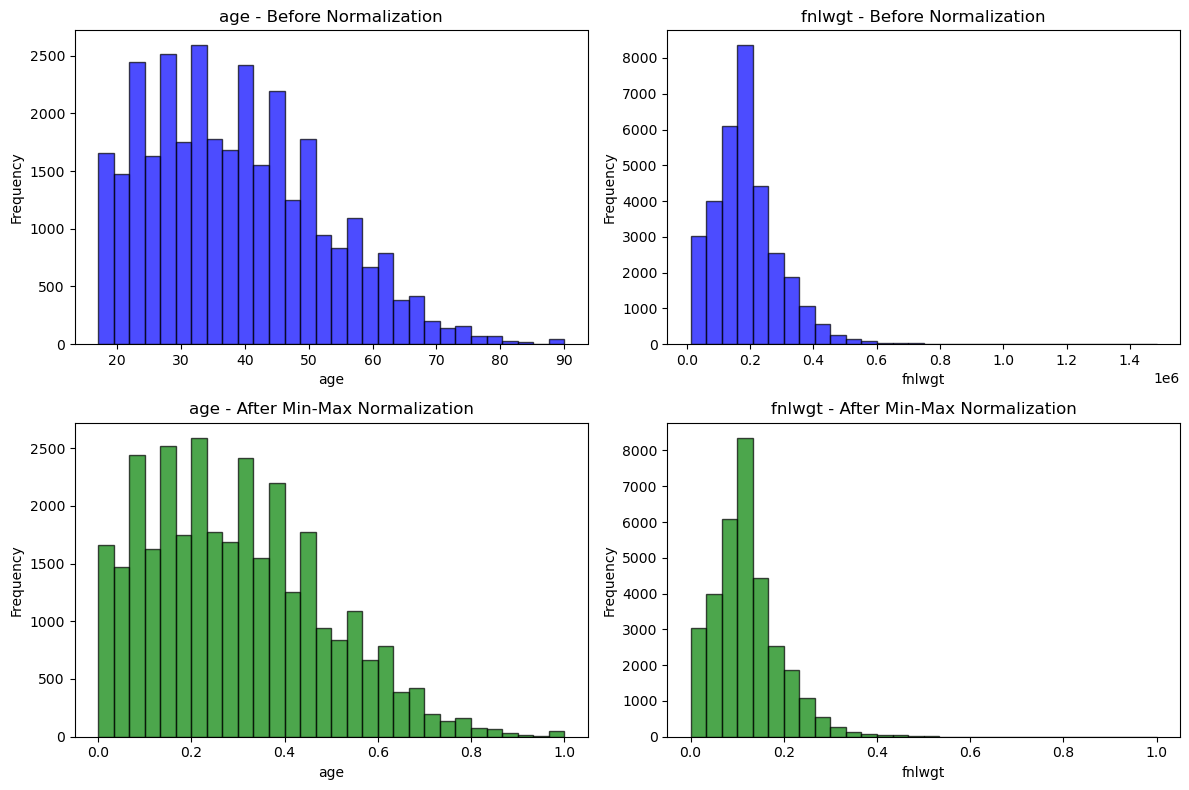

In [16]:
# Visualize the effect of normalization
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Select two numerical columns for visualization
cols_to_plot = numerical_cols[:2] if len(numerical_cols) >= 2 else numerical_cols

for i, col in enumerate(cols_to_plot):
    # Before normalization
    axes[0, i].hist(df_label_encoded[col], bins=30, color='blue', alpha=0.7, edgecolor='black')
    axes[0, i].set_title(f'{col} - Before Normalization')
    axes[0, i].set_xlabel(col)
    axes[0, i].set_ylabel('Frequency')
    
    # After normalization
    axes[1, i].hist(df_normalized[col], bins=30, color='green', alpha=0.7, edgecolor='black')
    axes[1, i].set_title(f'{col} - After Min-Max Normalization')
    axes[1, i].set_xlabel(col)
    axes[1, i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### 3.3 Standardization (Z-Score Normalization)
Transforms features to have mean=0 and standard deviation=1

Formula: $X_{standardized} = \frac{X - \mu}{\sigma}$

In [17]:
# Z-Score Standardization
print("=== Z-Score Standardization ===\n")

# Apply standardization only to numerical columns
df_standardized = df_label_encoded.copy()
standard_scaler = StandardScaler()

# Before standardization
print("Before Standardization (Numerical columns statistics):")
print(df_label_encoded[numerical_cols].describe().loc[['mean', 'std', 'min', 'max']])

# Apply Z-Score standardization
df_standardized[numerical_cols] = standard_scaler.fit_transform(df_standardized[numerical_cols])

print("\n" + "="*50)
print("\nAfter Z-Score Standardization (Numerical columns statistics):")
print(df_standardized[numerical_cols].describe().loc[['mean', 'std', 'min', 'max']])

=== Z-Score Standardization ===

Before Standardization (Numerical columns statistics):
            age        fnlwgt  education.num  capital.gain  capital.loss  \
mean  38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std   13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min   17.000000  1.228500e+04       1.000000      0.000000      0.000000   
max   90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

      hours.per.week  
mean       40.437456  
std        12.347429  
min         1.000000  
max        99.000000  


After Z-Score Standardization (Numerical columns statistics):
               age        fnlwgt  education.num  capital.gain  capital.loss  \
mean -3.666078e-17 -1.008172e-16   1.466431e-16  4.189804e-17 -3.491503e-17   
std   1.000015e+00  1.000015e+00   1.000015e+00  1.000015e+00  1.000015e+00   
min  -1.582206e+00 -1.681631e+00  -3.529656e+00 -1.459205e-01 -2.166595e-01   
max   3.769612e+00  1.226856e+01   2

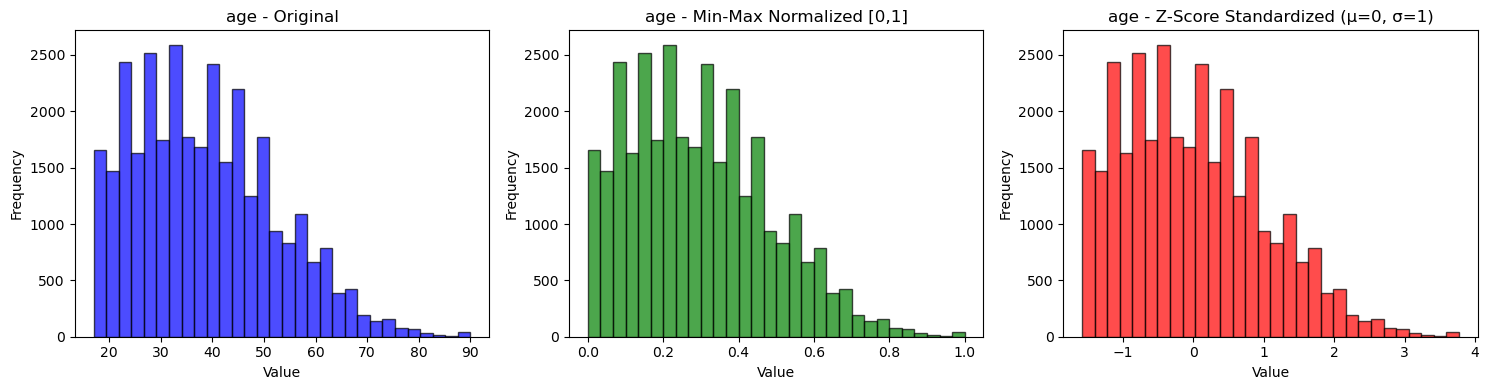

In [18]:
# Visualize Standardization vs Normalization comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

col = numerical_cols[0]  # Use the first numerical column

# Original
axes[0].hist(df_label_encoded[col], bins=30, color='blue', alpha=0.7, edgecolor='black')
axes[0].set_title(f'{col} - Original')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Normalized (Min-Max)
axes[1].hist(df_normalized[col], bins=30, color='green', alpha=0.7, edgecolor='black')
axes[1].set_title(f'{col} - Min-Max Normalized [0,1]')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

# Standardized (Z-Score)
axes[2].hist(df_standardized[col], bins=30, color='red', alpha=0.7, edgecolor='black')
axes[2].set_title(f'{col} - Z-Score Standardized (μ=0, σ=1)')
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 4. Dimensionality Reduction

### 4.1 PCA (Principal Component Analysis)
PCA reduces the number of features while preserving maximum variance in the data.

In [19]:
# Prepare data for PCA (use standardized numerical data)
print("=== PCA - Principal Component Analysis ===\n")

# Use the label encoded and standardized dataframe for PCA
X = df_standardized.copy()

print(f"Original number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")

# Apply PCA with all components first to see variance explained
pca_full = PCA()
pca_full.fit(X)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

print(f"\nExplained variance ratio by each component (first 10):")
for i, var in enumerate(pca_full.explained_variance_ratio_[:10]):
    print(f"  PC{i+1}: {var:.4f} ({var*100:.2f}%)")

=== PCA - Principal Component Analysis ===

Original number of features: 15
Number of samples: 32561

Explained variance ratio by each component (first 10):
  PC1: 0.4570 (45.70%)
  PC2: 0.1998 (19.98%)
  PC3: 0.1818 (18.18%)
  PC4: 0.0410 (4.10%)
  PC5: 0.0244 (2.44%)
  PC6: 0.0152 (1.52%)
  PC7: 0.0135 (1.35%)
  PC8: 0.0128 (1.28%)
  PC9: 0.0125 (1.25%)
  PC10: 0.0114 (1.14%)


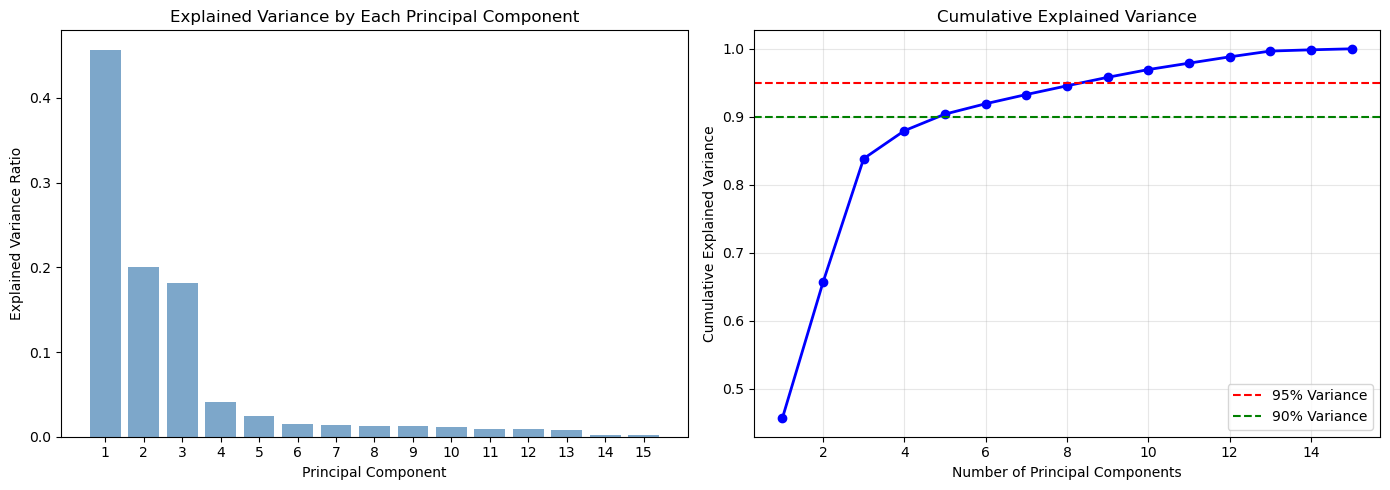


Number of components needed for 95% variance: 9


In [20]:
# Visualize explained variance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Individual explained variance
axes[0].bar(range(1, len(pca_full.explained_variance_ratio_) + 1), 
            pca_full.explained_variance_ratio_, color='steelblue', alpha=0.7)
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].set_title('Explained Variance by Each Principal Component')
axes[0].set_xticks(range(1, len(pca_full.explained_variance_ratio_) + 1))

# Cumulative explained variance
axes[1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 
             'bo-', linewidth=2, markersize=6)
axes[1].axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
axes[1].axhline(y=0.90, color='g', linestyle='--', label='90% Variance')
axes[1].set_xlabel('Number of Principal Components')
axes[1].set_ylabel('Cumulative Explained Variance')
axes[1].set_title('Cumulative Explained Variance')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find number of components for 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nNumber of components needed for 95% variance: {n_components_95}")

In [21]:
# Apply PCA with reduced dimensions
print("=== Applying PCA for Dimensionality Reduction ===\n")

# Reduce to 2 components for visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

print(f"Original shape: {X.shape}")
print(f"After PCA (2 components): {X_pca_2d.shape}")
print(f"Variance explained by 2 components: {sum(pca_2d.explained_variance_ratio_)*100:.2f}%")

# Create a dataframe with PCA results
df_pca_2d = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
print("\nPCA Transformed Data (first 5 rows):")
df_pca_2d.head()

=== Applying PCA for Dimensionality Reduction ===

Original shape: (32561, 15)
After PCA (2 components): (32561, 2)
Variance explained by 2 components: 65.68%

PCA Transformed Data (first 5 rows):


,PC1,PC2
0,1.629104,2.360609
1,1.648843,-2.929742
2,1.911930,0.463430
3,1.130856,2.369562
4,1.944812,0.453547


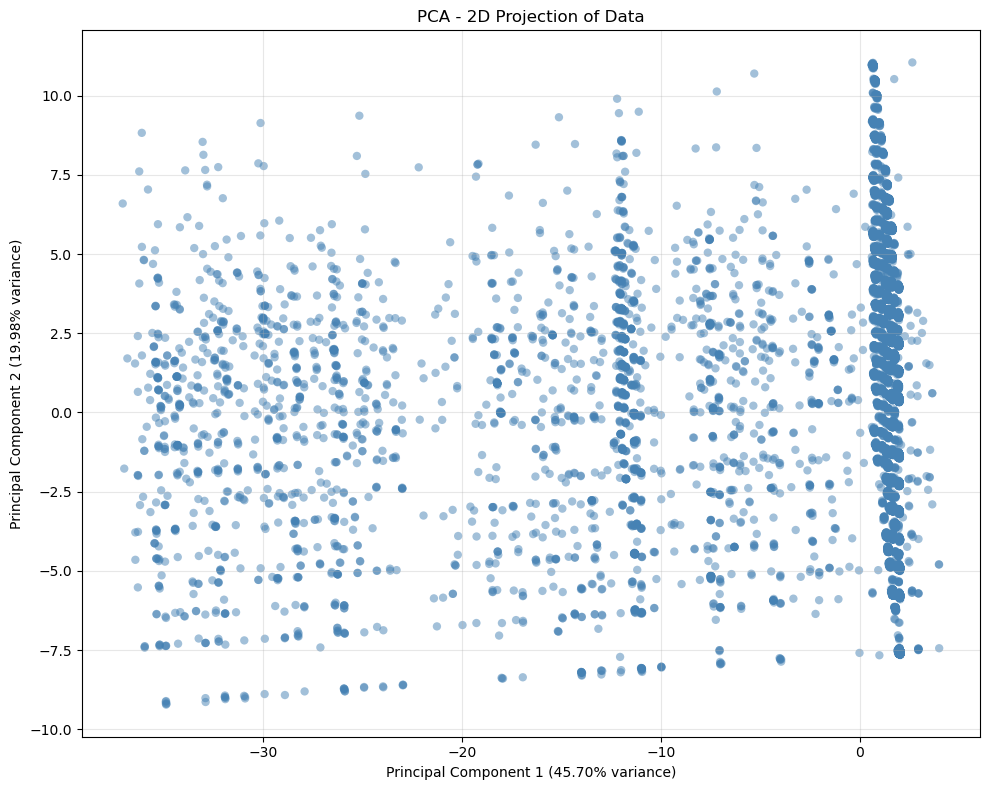

In [22]:
# Visualize PCA results (2D projection)
plt.figure(figsize=(10, 8))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], alpha=0.5, c='steelblue', edgecolors='none')
plt.xlabel(f'Principal Component 1 ({pca_2d.explained_variance_ratio_[0]*100:.2f}% variance)')
plt.ylabel(f'Principal Component 2 ({pca_2d.explained_variance_ratio_[1]*100:.2f}% variance)')
plt.title('PCA - 2D Projection of Data')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

=== PCA Component Loadings ===

This shows how much each original feature contributes to each principal component.

Feature Loadings for PC1 and PC2:
                     PC1       PC2
age             0.000041  0.001370
workclass      -0.000208  0.001198
fnlwgt         -0.010942  0.002406
education       0.082704 -0.462757
education.num   0.018213 -0.024630
marital.status -0.006340  0.020149
occupation     -0.004796  0.884683
relationship   -0.003448 -0.012672
race            0.016678 -0.000682
sex             0.000118  0.006571
capital.gain    0.001838  0.000538
capital.loss    0.001801  0.000287
hours.per.week  0.001811 -0.009696
native.country  0.996163  0.043268
income          0.002046 -0.000662


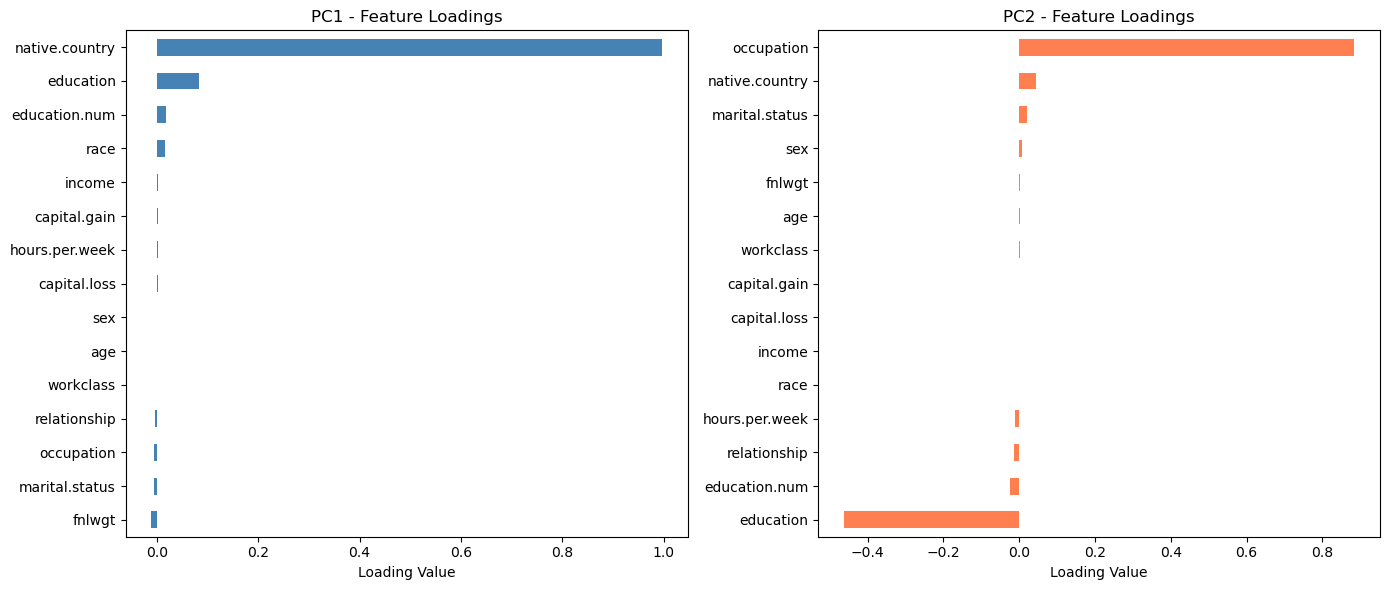

In [23]:
# PCA Component Loadings (Feature importance)
print("=== PCA Component Loadings ===\n")
print("This shows how much each original feature contributes to each principal component.\n")

loadings = pd.DataFrame(
    pca_2d.components_.T,
    columns=['PC1', 'PC2'],
    index=X.columns
)

print("Feature Loadings for PC1 and PC2:")
print(loadings)

# Visualize loadings
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

loadings['PC1'].sort_values().plot(kind='barh', ax=axes[0], color='steelblue')
axes[0].set_title('PC1 - Feature Loadings')
axes[0].set_xlabel('Loading Value')

loadings['PC2'].sort_values().plot(kind='barh', ax=axes[1], color='coral')
axes[1].set_title('PC2 - Feature Loadings')
axes[1].set_xlabel('Loading Value')

plt.tight_layout()
plt.show()

## 5. Data Discretization (Binning)

Converting continuous numerical data to categorical (discrete) values.

In [24]:
# Discretization / Binning
print("=== Data Discretization (Binning) ===\n")

# We'll use 'age' column if available, otherwise use the first numerical column
if 'age' in df_imputed.columns:
    bin_column = 'age'
else:
    bin_column = numerical_cols[0]

print(f"Discretizing column: '{bin_column}'")
print(f"Original values range: {df_imputed[bin_column].min()} to {df_imputed[bin_column].max()}")

# Equal-width binning
df_binned = df_imputed.copy()
df_binned[f'{bin_column}_equal_width'] = pd.cut(df_imputed[bin_column], bins=5, 
                                                  labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

print(f"\n1. Equal-Width Binning (5 bins):")
print(df_binned[f'{bin_column}_equal_width'].value_counts().sort_index())

=== Data Discretization (Binning) ===

Discretizing column: 'age'
Original values range: 17 to 90

1. Equal-Width Binning (5 bins):
age_equal_width
Very Low     11460
Low          12211
Medium        6558
High          2091
Very High      241
Name: count, dtype: int64


In [25]:
# Equal-frequency binning (Quantile-based)
df_binned[f'{bin_column}_equal_freq'] = pd.qcut(df_imputed[bin_column], q=5, 
                                                  labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'],
                                                  duplicates='drop')

print("2. Equal-Frequency Binning (Quantile-based, 5 bins):")
print(df_binned[f'{bin_column}_equal_freq'].value_counts().sort_index())

# Custom binning (if age column exists)
if bin_column == 'age':
    bins = [0, 18, 30, 45, 60, 100]
    labels = ['Youth', 'Young Adult', 'Middle Age', 'Senior', 'Elderly']
    df_binned[f'{bin_column}_custom'] = pd.cut(df_imputed[bin_column], bins=bins, labels=labels)
    print(f"\n3. Custom Binning for Age:")
    print(df_binned[f'{bin_column}_custom'].value_counts().sort_index())

2. Equal-Frequency Binning (Quantile-based, 5 bins):
age_equal_freq
Q1    7196
Q2    5967
Q3    6763
Q4    6175
Q5    6460
Name: count, dtype: int64

3. Custom Binning for Age:
age_custom
Youth            945
Young Adult     9627
Middle Age     12362
Senior          7295
Elderly         2332
Name: count, dtype: int64


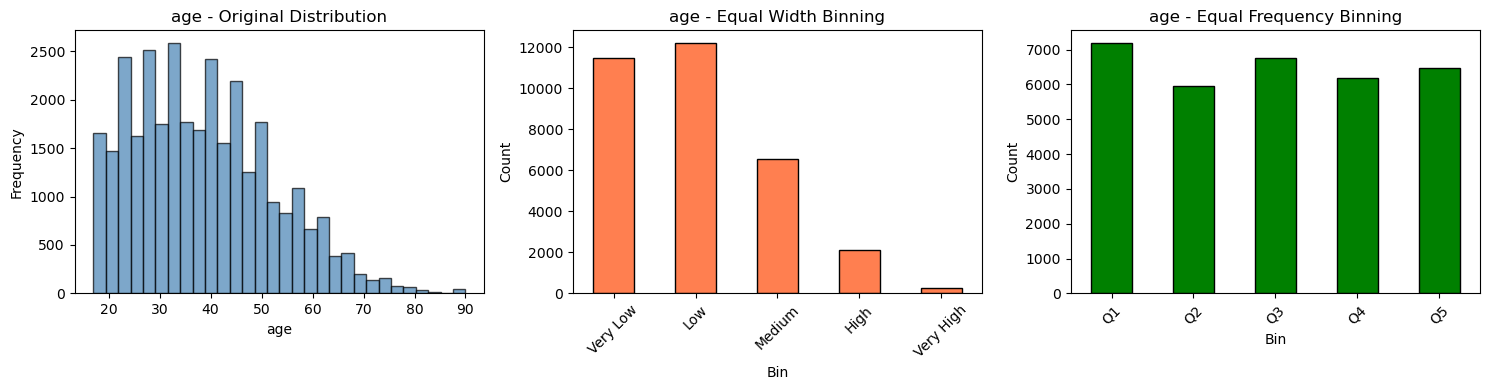

In [26]:
# Visualize binning results
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Original distribution
axes[0].hist(df_imputed[bin_column], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_title(f'{bin_column} - Original Distribution')
axes[0].set_xlabel(bin_column)
axes[0].set_ylabel('Frequency')

# Equal-width binning
df_binned[f'{bin_column}_equal_width'].value_counts().sort_index().plot(kind='bar', ax=axes[1], 
                                                                          color='coral', edgecolor='black')
axes[1].set_title(f'{bin_column} - Equal Width Binning')
axes[1].set_xlabel('Bin')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Equal-frequency binning
df_binned[f'{bin_column}_equal_freq'].value_counts().sort_index().plot(kind='bar', ax=axes[2], 
                                                                         color='green', edgecolor='black')
axes[2].set_title(f'{bin_column} - Equal Frequency Binning')
axes[2].set_xlabel('Bin')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 6. Summary - Final Prepared Dataset

In [27]:
# Summary of all data preparation steps
print("=" * 60)
print("        DATA PREPARATION SUMMARY")
print("=" * 60)

print("\n1. ORIGINAL DATASET:")
print(f"   - Shape: {df.shape}")
print(f"   - Missing values: {df.replace('?', np.nan).isnull().sum().sum()}")

print("\n2. AFTER DATA CLEANING (Imputation):")
print(f"   - Missing values handled: {df_imputed.isnull().sum().sum()} remaining")
print(f"   - Techniques used: Mean (numerical), Mode (categorical)")

print("\n3. FEATURE ENCODING:")
print(f"   - Label Encoded columns: {len(categorical_cols)}")
print(f"   - One-Hot Encoded shape: {df_onehot.shape}")

print("\n4. DATA TRANSFORMATION:")
print(f"   - Min-Max Normalization: Values scaled to [0, 1]")
print(f"   - Z-Score Standardization: Values centered at mean=0, std=1")

print("\n5. DIMENSIONALITY REDUCTION (PCA):")
print(f"   - Original features: {X.shape[1]}")
print(f"   - Components for 95% variance: {n_components_95}")
print(f"   - 2D projection variance explained: {sum(pca_2d.explained_variance_ratio_)*100:.2f}%")

print("\n6. DISCRETIZATION:")
print(f"   - Column discretized: {bin_column}")
print(f"   - Methods: Equal-width, Equal-frequency, Custom binning")

print("\n" + "=" * 60)
print("Data preparation completed successfully!")
print("=" * 60)

        DATA PREPARATION SUMMARY

1. ORIGINAL DATASET:
   - Shape: (32561, 15)
   - Missing values: 4262

2. AFTER DATA CLEANING (Imputation):
   - Missing values handled: 0 remaining
   - Techniques used: Mean (numerical), Mode (categorical)

3. FEATURE ENCODING:
   - Label Encoded columns: 9
   - One-Hot Encoded shape: (32561, 39)

4. DATA TRANSFORMATION:
   - Min-Max Normalization: Values scaled to [0, 1]
   - Z-Score Standardization: Values centered at mean=0, std=1

5. DIMENSIONALITY REDUCTION (PCA):
   - Original features: 15
   - Components for 95% variance: 9
   - 2D projection variance explained: 65.68%

6. DISCRETIZATION:
   - Column discretized: age
   - Methods: Equal-width, Equal-frequency, Custom binning

Data preparation completed successfully!


In [28]:
# Display the final prepared dataset (normalized and encoded)
print("Final Prepared Dataset (Normalized + Label Encoded):")
print(f"Shape: {df_normalized.shape}")
print("\nFirst 10 rows:")
df_normalized.head(10)

Final Prepared Dataset (Normalized + Label Encoded):
Shape: (32561, 15)

First 10 rows:


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,1.000000,3,0.043987,11,0.533333,6,9,1,4,0,0.0,1.000000,0.397959,38,0
1,0.890411,3,0.081896,11,0.533333,6,3,1,4,0,0.0,1.000000,0.173469,38,0
2,0.671233,3,0.118021,15,0.600000,6,9,4,2,0,0.0,1.000000,0.397959,38,0
3,0.506849,3,0.086982,5,0.200000,0,6,4,4,0,0.0,0.895317,0.397959,38,0
4,0.328767,3,0.171404,15,0.600000,5,9,3,4,0,0.0,0.895317,0.397959,38,0
5,0.232877,3,0.138941,11,0.533333,0,7,4,4,0,0.0,0.865473,0.448980,38,0
6,0.287671,3,0.093938,0,0.333333,5,0,4,4,1,0.0,0.865473,0.397959,38,0
7,0.780822,6,0.051855,10,1.000000,4,9,2,4,0,0.0,0.845500,0.193878,38,1
8,0.698630,0,0.278268,11,0.533333,0,9,1,4,0,0.0,0.845500,0.397959,38,0
9,0.328767,3,0.039223,15,0.600000,4,2,4,4,1,0.0,0.689624,0.602041,38,1


## Conclusion

In this lab, we successfully performed the following data preparation techniques:

1. **Data Cleaning**: Identified and handled missing values using mean, median, and mode imputation techniques.

2. **Feature Encoding**: 
   - Applied Label Encoding to convert categorical variables to numerical format
   - Applied One-Hot Encoding to create binary columns for categorical variables

3. **Data Transformation**:
   - Min-Max Normalization: Scaled numerical features to [0, 1] range
   - Z-Score Standardization: Transformed features to have mean=0 and std=1

4. **Dimensionality Reduction**:
   - Applied PCA to reduce the number of features while preserving maximum variance
   - Visualized the explained variance and component loadings

5. **Data Discretization**:
   - Converted continuous variables to categorical using equal-width and equal-frequency binning

The prepared dataset is now ready for further analysis and data mining tasks.